In [65]:
# packages to store and manipulate data
import pandas as pd
import numpy as np

# plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

# model building package
import sklearn

# package to clean text
import re

In [69]:
df = pd.read_pickle('alltweets_collection_df1true.pkl') #importing sample tweets dataset

In [70]:
df.rename(columns={'text': 'tweet'}, inplace=True)
df.head()

,id,tweet,time,coordinates,geo_city,geo_state
0,1313904068327280645,FL +11? If true (and we keep saying this in po...,Wed Oct 07 18:08:35 +0000 2020,None,Memphis,TN
1,1313904093761593353,@realDonaldTrump this is Russian propaganda fr...,Wed Oct 07 18:08:41 +0000 2020,None,Stephenville,TX
2,1313904097423233033,@hln8185 @evanasmith @Civiqs @dailykos @realDo...,Wed Oct 07 18:08:42 +0000 2020,None,Austin,TX
3,1313904131380252678,Garbage polls. Right in the trash.,Wed Oct 07 18:08:50 +0000 2020,None,Boston,MA
4,1313904143766089729,@JoeBiden Yes Man and why is everyone spending...,Wed Oct 07 18:08:53 +0000 2020,None,Huntsville,AL


In [71]:
print(df.shape)
print(df.tweet.unique().shape)

(96432, 6)
(94198,)


In [72]:
df['is_retweet'] = df['tweet'].apply(lambda x: x[:2]=='RT')
df['is_retweet'].sum()  # number of retweets
df
 # number of unique retweets
df.loc[df['is_retweet']].tweet.unique().size

13

In [73]:
# 10 most repeated tweets
df.groupby(['tweet']).size().reset_index(name='counts')\
  .sort_values('counts', ascending=False).head(10)

,tweet,counts
54990,Amen,42
61321,Exactly,38
81013,Thank you,27
55023,Amen!,23
42556,@realDonaldTrump Jesus Mary and Joseph,22
54579,Agree,19
54612,Agreed,19
85007,This.,18
85106,Thread,18
86088,Truth,17


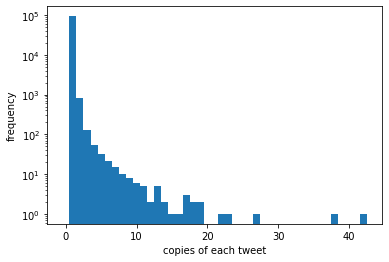

In [74]:
# number of times each tweet appears
counts = df.groupby(['tweet']).size()\
           .reset_index(name='counts')\
           .counts

# define bins for histogram
my_bins = np.arange(0,counts.max()+2, 1)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('copies of each tweet')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [75]:
def find_retweeted(tweet):
    '''This function will extract the twitter handles of retweed people'''
    return re.findall('(?<=RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

def find_mentioned(tweet):
    '''This function will extract the twitter handles of people mentioned in the tweet'''
    return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)  

def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [76]:
# make new columns for retweeted usernames, mentioned usernames and hashtags
df['retweeted'] = df.tweet.apply(find_retweeted)
df['mentioned'] = df.tweet.apply(find_mentioned)
df['hashtags'] = df.tweet.apply(find_hashtags)

In [77]:
df

,id,tweet,time,coordinates,geo_city,geo_state,is_retweet,retweeted,mentioned,hashtags
0,1313904068327280645,FL +11? If true (and we keep saying this in po...,Wed Oct 07 18:08:35 +0000 2020,None,Memphis,TN,False,[],[],[]
1,1313904093761593353,@realDonaldTrump this is Russian propaganda fr...,Wed Oct 07 18:08:41 +0000 2020,None,Stephenville,TX,False,[],[@realDonaldTrump],[]
2,1313904097423233033,@hln8185 @evanasmith @Civiqs @dailykos @realDo...,Wed Oct 07 18:08:42 +0000 2020,None,Austin,TX,False,[],"[@hln8185, @evanasmith, @Civiqs, @dailykos, @r...",[]
3,1313904131380252678,Garbage polls. Right in the trash.,Wed Oct 07 18:08:50 +0000 2020,None,Boston,MA,False,[],[],[]
4,1313904143766089729,@JoeBiden Yes Man and why is everyone spending...,Wed Oct 07 18:08:53 +0000 2020,None,Huntsville,AL,False,[],[@JoeBiden],[]
...,...,...,...,...,...,...,...,...,...,...
141489,1318118780216672257,Crawl back in the hole that you and your fami...,Mon Oct 19 09:16:21 +0000 2020,None,Blackwood,NJ,False,[],[],[]
141490,1318118899154563072,@realDonaldTrump @realDonaldTrump Your just as...,Mon Oct 19 09:16:49 +0000 2020,None,Chesapeake,VA,False,[],"[@realDonaldTrump, @realDonaldTrump]",[]
141495,1318119309214945284,@saltymarine80 @Jillbiden46 @JoeBiden Omg lmao 😂,Mon Oct 19 09:18:27 +0000 2020,None,Fairview,NY,False,[],"[@saltymarine80, @Jillbiden46, @JoeBiden]",[]
141497,1318119371441606657,From experience I can tell you Walgreens rapid...,Mon Oct 19 09:18:42 +0000 2020,None,Alpharetta,GA,False,[],[],[]


In [78]:
# take the rows from the hashtag columns where there are actually hashtags
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]

In [79]:
hashtags_list_df 

,hashtags
6,[#BidenHarris2020]
21,"[#trumpisadump, #trumpthedump]"
22,"[#TrumpMeltdown, #VoteHimOut2020]"
48,"[#sealthedeal, #FlushTheTurdNov3rd]"
85,[#Debates2020]
...,...
141267,"[#OctoberSurprise, #Pathetic]"
141338,[#America]
141351,[#VoteBidenHarris]
141367,[#BidenHarris2020Landslide]


In [80]:
# create dataframe where each use of hashtag gets its own row
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])

In [81]:
# number of unique hashtags
flattened_hashtags_df['hashtag'].unique().size

4609

In [82]:
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

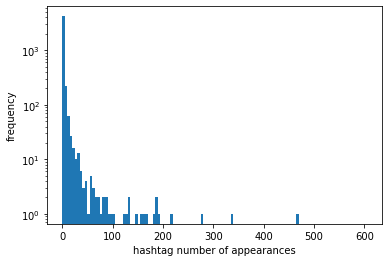

In [83]:
# number of times each hashtag appears
counts = flattened_hashtags_df.groupby(['hashtag']).size()\
                              .reset_index(name='counts')\
                              .counts

# define bins for histogram                              
my_bins = np.arange(0,counts.max()+2, 5)-0.5

# plot histogram of tweet counts
plt.figure()
plt.hist(counts, bins = my_bins)
plt.xlabels = np.arange(1,counts.max()+1, 1)
plt.xlabel('hashtag number of appearances')
plt.ylabel('frequency')
plt.yscale('log', nonposy='clip')
plt.show()

In [84]:
# take hashtags which appear at least this amount of times
min_appearance = 10
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

In [85]:
# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]


In [86]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

In [87]:
hashtag_vector_df
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

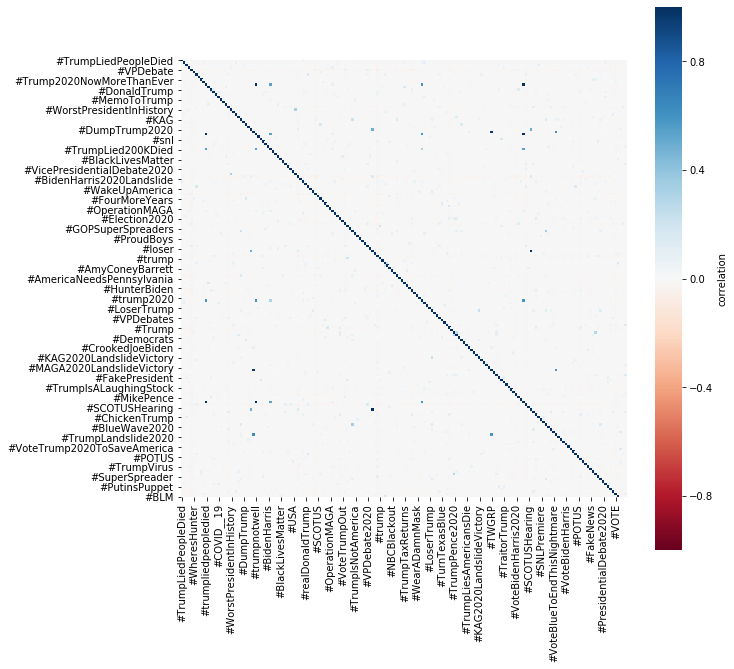

In [88]:
# calculate the correlation matrix
correlations = hashtag_matrix.corr()

# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
    cmap='RdBu',
    vmin=-1,
    vmax=1,
    square = True,
    cbar_kws={'label':'correlation'})
plt.show()

In [89]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

In [90]:
def remove_links(tweet):
    '''Takes a string and removes web links from it'''
    tweet = re.sub(r'http\S+', '', tweet) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]') # remove [links]
    return tweet

def remove_users(tweet):
    '''Takes a string and removes retweet and @user information'''
    tweet = re.sub('(RT\s@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove retweet
    tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet) # remove tweeted at
    return tweet

In [91]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
    tweet = remove_users(tweet)
    tweet = remove_links(tweet)
    tweet = tweet.lower() # lower case
    tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
    tweet = re.sub('\s+', ' ', tweet) #remove double spacing
    tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
    tweet_token_list = [word for word in tweet.split(' ')
                            if word not in my_stopwords] # remove stopwords

    tweet_token_list = [word_rooter(word) if '#' not in word else word
                        for word in tweet_token_list] # apply word rooter
    if bigrams:
        tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
                                            for i in range(len(tweet_token_list)-1)]
    tweet = ' '.join(tweet_token_list)
    return tweet

In [92]:
df['clean_tweet'] = df.tweet.apply(clean_tweet)

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(df['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [94]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 1

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)

In [95]:
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=1, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [96]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)

In [98]:
no_top_words = 20
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights
0,biden,15093.0
1,trump,10007.0
2,’,7983.0
3,vote,5962.0
4,’t,5862.0
5,joe,4251.0
6,presid,3986.0
7,go,3650.0
8,get,3620.0
9,like,3600.0
